In [1]:
library(survival)
library(ggplot2)
library(dplyr)
library(reshape2)

Warning message:
“package ‘survival’ was built under R version 4.3.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
dir_fig = 'R_clogit/for_publish/'

In [3]:
### clean features
fts = c('PLIp9_LOF_DEV_BR_10_cds',
        'LOF_DEV_BR_10_cds',
        'LOF_PLIp9_cds', 
        'LOF_LOWPLI_cds',
        'PLIp9_DEV_BR_GENE_10_cds', 
        'DEV_BR_GENE_10_cds', 
        'PLIp9_cds', 
        'LOWPLI_cds',
        #'EV_CONS_EL_FRAC_10_cds',
        'S_HET_10_cds',
        'PLIp9_DEV_BR_GENE_10_utr',
        'DEV_BR_GENE_10_utr', 
        'PLIp9_utr', 
        'LOWPLI_utr',
        #'EV_CONS_EL_FRAC_10_utr',
        'S_HET_10_utr',
        'PLIp9_DEV_BR_GENE_10_intron',
        'DEV_BR_GENE_10_intron', 
        'PLIp9_intron', 
        'LOWPLI_intron',
        #'EV_CONS_EL_FRAC_10_ncd',
        'S_HET_10_intron',
        'GNOCCHI_MAX_3', 'GNOCCHI_MAX_2')
fts_labels = c('LOF dev. brain pLI≥.9 genes, CDS', 
               'LOF dev. brain genes, CDS', 
               'LOF pLI≥.9, CDS', 
               'LOF pLI≤.9, CDS',
               'dev. brain pLI≥.9 genes, CDS', 
               'dev. brain genes, CDS', 
               'pLI≥.9, CDS', 
               'pLI≤.9, CDS',
               #'Evol. Consv. frc≥.1, CDS',
               'S het≥0.01, CDS',
               'dev. brain pLI≥.9 genes, UTR',
               'dev. brain genes, UTR', 
               'pLI≥.9, UTR', 
               'pLI≤.9, UTR',
               #'Evol. Consv. frc≥.1, UTR',
               'S het≥0.01, UTR',
               'dev. brain pLI≥.9 genes, intron',
               'dev. brain genes, intron', 
               'pLI≥.9, intron', 
               'pLI≤.9, intron', 
               #'Evol. Consv. frc≥.1, non-CD',
               'S het≥0.01, intron',
               'Gnocchi≥3', 'Gnocchi≥2')

In [4]:
get_pval_char <- function(pval) {
    if (pval>0.05) {return('')}
    if ((pval<0.05) && (pval>0.01)) {return('*')}
    else if ((pval<0.01) && (pval>0.001)) {return('**')}
    else {return('***')}
}

[1] "======================================================="
[1] "main_df_toR_freq05_LRIL_SQ70_SAMPLES_AD2_SAMPLES.csv"
[1] "SQ70"
[1] 243 167
[1] "combined samples......................."
[1] "non-carrier samples......................."
[1] "R_clogit/for_publish/devBrainPLI_SQ70.png"
[1] "R_clogit/for_publish/devBrain_SQ70.png"


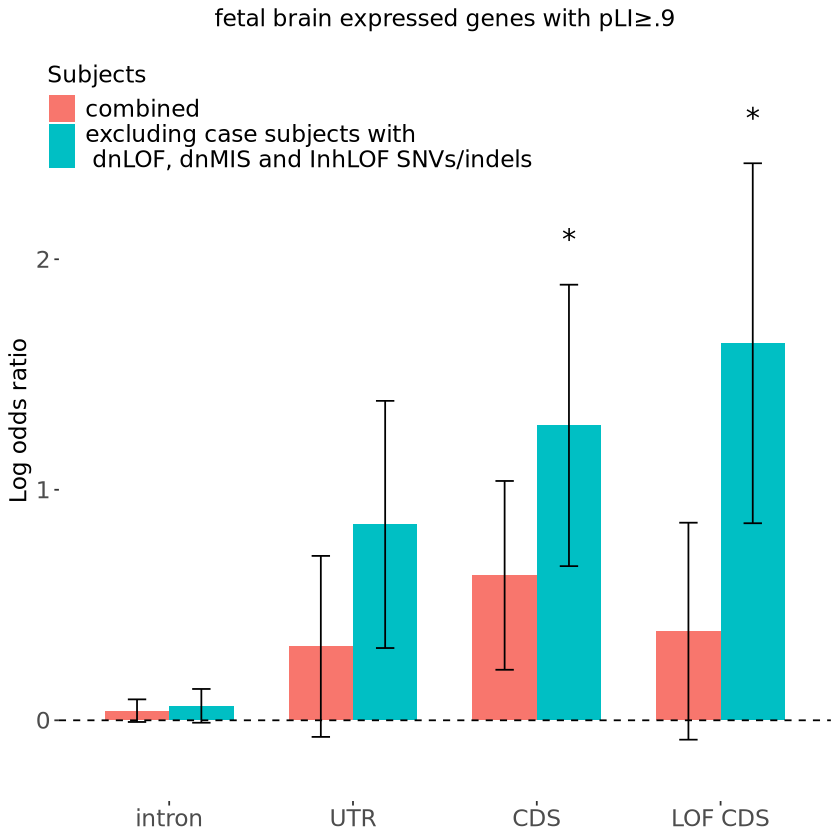

[1] "R_clogit/for_publish/PLI_SQ70.png"


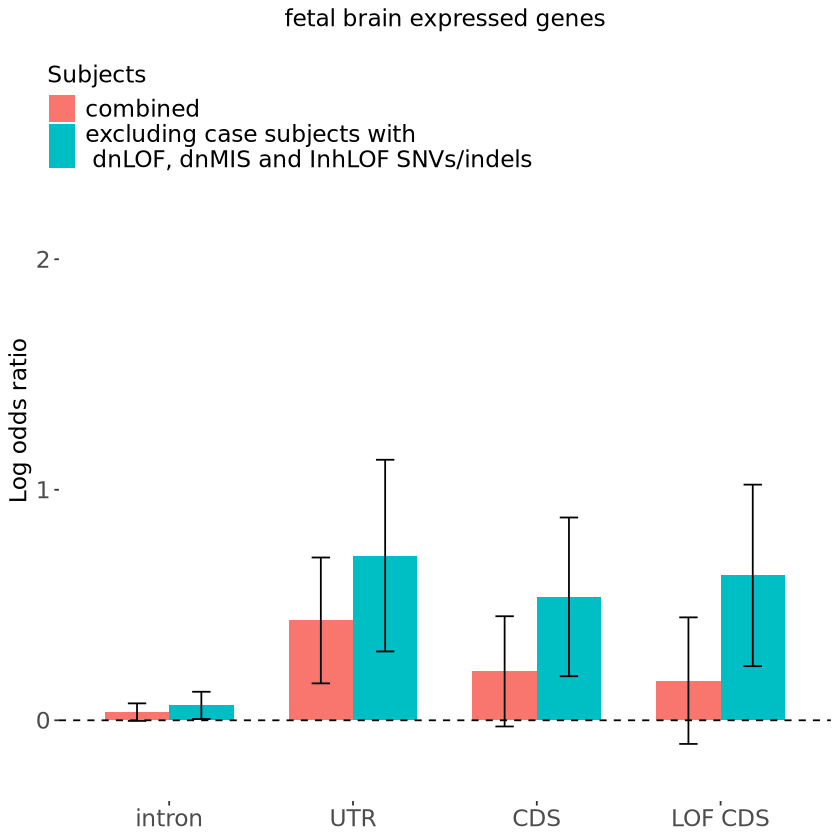

[1] "R_clogit/for_publish/LOWPLI_SQ70.png"


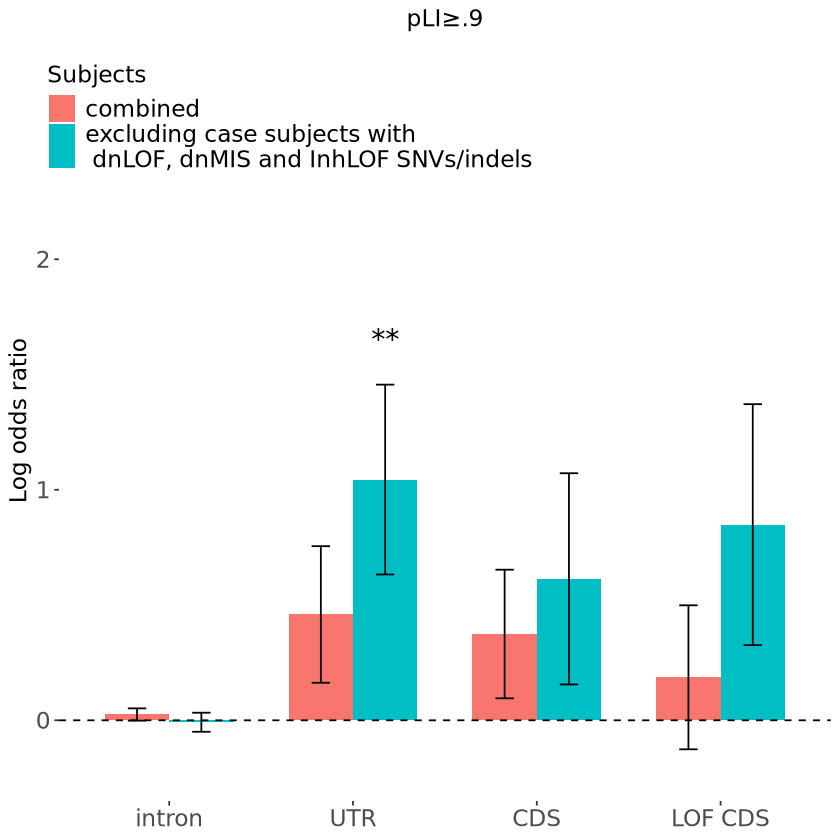

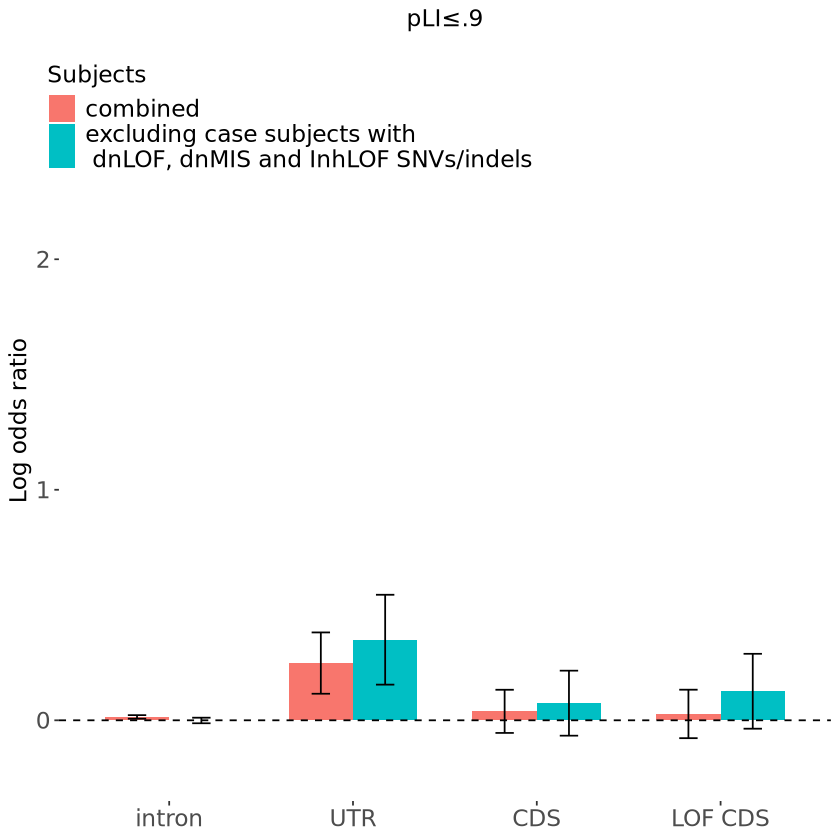

In [7]:
#PRINT_INFO = TRUE
PRINT_INFO = FALSE

file_mains = c('main_df_toR_freq05_LRIL_SQ20_SAMPLES_AD2_SAMPLES.csv', 'main_df_toR_freq05_LRIL_SQ30_SAMPLES_AD2_SAMPLES.csv', 
               'main_df_toR_freq05_LRIL_SQ40_SAMPLES_AD2_SAMPLES.csv', 'main_df_toR_freq05_LRIL_SQ50_SAMPLES_AD2_SAMPLES.csv', 
               'main_df_toR_freq05_LRIL_SQ60_SAMPLES_AD2_SAMPLES.csv', 'main_df_toR_freq05_LRIL_SQ70_SAMPLES_AD2_SAMPLES.csv')

#for (i_file in 1:length(file_mains)) {
for (i_file in 6:6) {
    print('=======================================================')
    file_main = file_mains[i_file]
    flt = unlist(strsplit(file_main, split='_'))[6]
    print(file_main)
    print(flt)

    df_main <- read.table(file_main, header = TRUE, sep = ",")
    df_main[,'Platform'] <- as.factor(df_main[,'Platform'])
    df_main[,'sex'] <- as.factor(df_main[,'sex'])
    print(dim(df_main))

    df_main_ncar <- df_main %>%
        filter(!((rel=='C') & (Affected=='Yes') & (SNV_CAR==1)))

    df_main_car <- df_main %>%
        filter(!((rel=='C') & (Affected=='Yes') & (SNV_CAR==0)))

    if (PRINT_INFO) {
        print('non-carrier df dim:')
        print(dim(df_main_ncar))
        print('carrier df dim:')
        print(dim(df_main_car))

        print('parent case SNV_CAR table:')
        print(table(df_main[(df_main$rel=='P')&(df_main$Affected=='Yes'),]$SNV_CAR))
        print('parent control SNV_CAR table:')
        print(table(df_main[(df_main$rel=='P')&(df_main$Affected=='No'),]$SNV_CAR))
        print('child case SNV_CAR table:')
        print(table(df_main[(df_main$rel=='C')&(df_main$Affected=='Yes'),]$SNV_CAR))
        print('child control SNV_CAR table:')
        print(table(df_main[(df_main$rel=='C')&(df_main$Affected=='No'),]$SNV_CAR))
        
        print(dim(df_main_ncar))
        print('non-carrier df parent case SNV_CAR table:')
        print(table(df_main_ncar[(df_main_ncar$rel=='P')&(df_main_ncar$Affected=='Yes'),]$SNV_CAR))
        print('non-carrier df parent control SNV_CAR table:')
        print(table(df_main_ncar[(df_main_ncar$rel=='P')&(df_main_ncar$Affected=='No'),]$SNV_CAR))
        print('non-carrier df child case SNV_CAR table:')
        print(table(df_main_ncar[(df_main_ncar$rel=='C')&(df_main_ncar$Affected=='Yes'),]$SNV_CAR))
        print('non-carrier df child control SNV_CAR table:')
        print(table(df_main_ncar[(df_main_ncar$rel=='C')&(df_main_ncar$Affected=='No'),]$SNV_CAR))

        print(dim(df_main_car))
        print('carrier df parent case SNV_CAR table:')
        print(table(df_main_car[(df_main_car$rel=='P')&(df_main_car$Affected=='Yes'),]$SNV_CAR))
        print('carrier df parent control SNV_CAR table:')
        print(table(df_main_car[(df_main_car$rel=='P')&(df_main_car$Affected=='No'),]$SNV_CAR))
        print('carrier df child case SNV_CAR table:')
        print(table(df_main_car[(df_main_car$rel=='C')&(df_main_car$Affected=='Yes'),]$SNV_CAR))
        print('carrier df child control SNV_CAR table:')
        print(table(df_main_car[(df_main_car$rel=='C')&(df_main_car$Affected=='No'),]$SNV_CAR))
    }

    null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

    ### combined samples...
    print('combined samples.......................')
    ORs = c()
    ORs_plus = c()
    ORs_minus = c()
    log_ORs = c()
    log_ORs_plus = c()
    log_ORs_minus = c()
    pvals = c()
    ano_pvals = c()
    sum_cases = c()
    sum_controls = c()
    for (ft in fts) {
        var = paste('count_', ft, sep="")
        ###print(var)
    
        sum_case = sum(df_main[df_main$Phenotype==1,][,var])
        sum_control = sum(df_main[df_main$Phenotype==0,][,var])
        sum_cases = c(sum_cases, sum_case)
        sum_controls = c(sum_controls, sum_control)
        
        model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + 
                                         PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
        null_model <- clogit(null_formula, data = df_main)
        #print(summary(null_model))
    
        clogit_model <- clogit(model_formula, data = df_main)
        #print(summary(clogit_model))
        #print(str(summary(clogit_model)))
        OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
        OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
        OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
        log_OR = summary(clogit_model)$coefficients[var, 'coef']
        log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
        log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
        pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
        ORs = c(ORs, OR)
        ORs_plus = c(ORs_plus, OR_plus)
        ORs_minus = c(ORs_minus, OR_minus)
        log_ORs = c(log_ORs, log_OR)
        log_ORs_plus = c(log_ORs_plus, log_OR_plus)
        log_ORs_minus = c(log_ORs_minus, log_OR_minus)
        pvals = c(pvals, pval)
        
        ano <- anova(null_model, clogit_model, test='LRT')
        ano_pval = ano$"Pr(>|Chi|)"[2]
        ano_pvals = c(ano_pvals, ano_pval)
    }

    sum_case_controls = paste(as.character(sum_cases), as.character(sum_controls), sep='/')

    if (PRINT_INFO) {
    print('ORs:')
    print(ORs)
    print('ORs_plus:')
    print(ORs_plus)
    print('ORs_minus:')
    print(ORs_minus)
    print('log_ORs:')
    print(log_ORs)
    print('log_ORs_plus:')
    print(log_ORs_plus)
    print('log_ORs_minus:')
    print(log_ORs_minus)
    print('pvals:')
    print(pvals)
    print('ano_pvals:')
    print(ano_pvals)
    print('sum_cases:')
    print(sum_cases)
    print('sum_controls:')
    print(sum_controls)
    print('sum_case_controls:')
    print(sum_case_controls)
    }


    ### non-carrier samples...
    print('non-carrier samples.......................')
    ORs_ncar = c()
    ORs_plus_ncar = c()
    ORs_minus_ncar = c()
    log_ORs_ncar = c()
    log_ORs_plus_ncar = c()
    log_ORs_minus_ncar = c()
    pvals_ncar = c()
    ano_pvals_ncar = c()
    sum_cases_ncar = c()
    sum_controls_ncar = c()
    for (ft in fts) {
        var = paste('count_', ft, sep="")
        ###print(var)
    
        sum_case = sum(df_main_ncar[df_main_ncar$Phenotype==1,][,var])
        sum_control = sum(df_main_ncar[df_main_ncar$Phenotype==0,][,var])
        sum_cases_ncar = c(sum_cases_ncar, sum_case)
        sum_controls_ncar = c(sum_controls_ncar, sum_control)
        
        model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + 
                                         PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
        null_model <- clogit(null_formula, data = df_main_ncar)
        #print(summary(null_model))
    
        clogit_model <- clogit(model_formula, data = df_main_ncar)
        #print(summary(clogit_model))
        #print(str(summary(clogit_model)))
        OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
        OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
        OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
        log_OR = summary(clogit_model)$coefficients[var, 'coef']
        log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
        log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
        pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
        ORs_ncar = c(ORs_ncar, OR)
        ORs_plus_ncar = c(ORs_plus_ncar, OR_plus)
        ORs_minus_ncar = c(ORs_minus_ncar, OR_minus)
        log_ORs_ncar = c(log_ORs_ncar, log_OR)
        log_ORs_plus_ncar = c(log_ORs_plus_ncar, log_OR_plus)
        log_ORs_minus_ncar = c(log_ORs_minus_ncar, log_OR_minus)
        pvals_ncar = c(pvals_ncar, pval)
        
        ano <- anova(null_model, clogit_model, test='LRT')
        ano_pval = ano$"Pr(>|Chi|)"[2]
        ano_pvals_ncar = c(ano_pvals_ncar, ano_pval)
    }

    sum_case_controls_ncar = paste(as.character(sum_cases_ncar), as.character(sum_controls_ncar), sep='/')

    if (PRINT_INFO) {
    print('ORs_ncar:')
    print(ORs_ncar)
    print('ORs_plus_ncar:')
    print(ORs_plus_ncar)
    print('ORs_minus_ncar:')
    print(ORs_minus_ncar)
    print('log_ORs_ncar:')
    print(log_ORs_ncar)
    print('log_ORs_plus_ncar:')
    print(log_ORs_plus_ncar)
    print('log_ORs_minus_ncar:')
    print(log_ORs_minus_ncar)
    print('pvals_ncar:')
    print(pvals_ncar)
    print('ano_pvals_ncar:')
    print(ano_pvals_ncar)
    print('sum_cases_ncar:')
    print(sum_cases_ncar)
    print('sum_controls_ncar:')
    print(sum_controls_ncar)
    print('sum_case_controls_ncar:')
    print(sum_case_controls_ncar)
    }

    my_data = data.frame('fts' = fts, 'fts_labels' = fts_labels, 
                         'log_ORs_comb' = log_ORs, 'log_ORs_plus_comb' = log_ORs_plus, 'log_ORs_minus_comb' = log_ORs_minus, 
                         'ano_pval_comb' = ano_pvals, 
                         'sum_case_con_comb' = sum_case_controls, 
                         'log_ORs_ncar' = log_ORs_ncar, 'log_ORs_plus_ncar' = log_ORs_plus_ncar, 'log_ORs_minus_ncar' = log_ORs_minus_ncar, 
                         'ano_pval_ncar' = ano_pvals_ncar, 
                         'sum_case_con_ncar' = sum_case_controls_ncar)
    #print(my_data)

    sub_fts_labels = c('intron', 'UTR', 'CDS', 'LOF CDS')
    sub_fts_1 = c('PLIp9_DEV_BR_GENE_10_intron', 'PLIp9_DEV_BR_GENE_10_utr', 'PLIp9_DEV_BR_GENE_10_cds', 'PLIp9_LOF_DEV_BR_10_cds')
    title_1 = 'fetal brain expressed genes with pLI≥.9'
    fig_base_1 = 'devBrainPLI'
    sub_fts_2 = c('DEV_BR_GENE_10_intron', 'DEV_BR_GENE_10_utr', 'DEV_BR_GENE_10_cds', 'LOF_DEV_BR_10_cds')
    title_2 = 'fetal brain expressed genes'
    fig_base_2 = 'devBrain'
    sub_fts_3 = c('PLIp9_intron', 'PLIp9_utr', 'PLIp9_cds', 'LOF_PLIp9_cds')
    title_3 = 'pLI≥.9'
    fig_base_3 = 'PLI'
    sub_fts_4 = c('LOWPLI_intron', 'LOWPLI_utr', 'LOWPLI_cds', 'LOF_LOWPLI_cds')
    title_4 = 'pLI≤.9'
    fig_base_4 = 'LOWPLI'
    #sub_fts = c('GNOCCHI_MAX_3_intron', 'GNOCCHI_MAX_3_utr', 'GNOCCHI_MAX_3_cds', 'GNOCCHI_MAX_3_?')

    sub_flts_list = list(sub_fts_1, sub_fts_2, sub_fts_3, sub_fts_4)
    title_list = list(title_1, title_2, title_3, title_4)
    fig_base_list = list(fig_base_1, fig_base_2, fig_base_3, fig_base_4)

    for (i_plot in 1:length(sub_flts_list)) {
    #for (i_plot in 1:1) {
        sub_fts = sub_flts_list[[i_plot]]
        title = title_list[[i_plot]]
        fig_base = fig_base_list[[i_plot]]
        fig_name = paste0(dir_fig, fig_base, "_", flt, ".png")

        my_data_sub = my_data[my_data$fts %in% sub_fts,]
        my_data_sub$fts <- factor(my_data_sub$fts, levels = sub_fts)
        #print('subset df:')
        #print(my_data_sub)

        my_data_sub.melt = melt(my_data_sub, id.vars = c('fts', 'fts_labels', 
                                                         'log_ORs_plus_comb', 'log_ORs_minus_comb', 
                                                         'ano_pval_comb', 
                                                         'sum_case_con_comb', 
                                                         'log_ORs_plus_ncar', 'log_ORs_minus_ncar', 
                                                         'ano_pval_ncar', 
                                                         'sum_case_con_ncar'), 
                                variable.name = 'comb_ncar', value.name = 'log_ORs')

        my_data_sub.melt <- transform(my_data_sub.melt, log_ORs_plus = ifelse(comb_ncar=='log_ORs_comb', log_ORs_plus_comb, log_ORs_plus_ncar))
        my_data_sub.melt <- transform(my_data_sub.melt, log_ORs_minus = ifelse(comb_ncar=='log_ORs_comb', log_ORs_minus_comb, log_ORs_minus_ncar))
        my_data_sub.melt <- transform(my_data_sub.melt, ano_pval = ifelse(comb_ncar=='log_ORs_comb', ano_pval_comb, ano_pval_ncar))
        my_data_sub.melt <- transform(my_data_sub.melt, sum_case_con = ifelse(comb_ncar=='log_ORs_comb', sum_case_con_comb, sum_case_con_ncar))

        sig <- sapply(my_data_sub.melt$ano_pval, get_pval_char)
        my_data_sub.melt$sig = sig

        #print('my_data_sub.melt:')
        #print(my_data_sub.melt)

        size_txt = 14
        size_sig = 6
        ylim_min = -0.2
        ylim_max = 2.8

        #geom_text(aes(label = tr_ntr), position=position_dodge(width=0.9), angle=90, hjust=0, vjust=0.5, size=2) +
        #plot.margin = margin(t = 1.5, l = 1.5, r = 1, b = 1, "cm"),

        base <- ggplot(my_data_sub.melt, aes(x = fts, y = log_ORs, fill = comb_ncar, ymin=log_ORs_minus , ymax=log_ORs_plus)) +
          geom_bar(position = position_dodge(width=0.7), stat = "identity", width = 0.7) +
          geom_errorbar(position = position_dodge(width=0.7), aes(ymin = log_ORs_minus, ymax = log_ORs_plus), width = 0.2) +
          geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
          geom_text(aes(label = sig, y = log_ORs_plus+0.2), position=position_dodge(width=0.7), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
          labs(y = "Log odds ratio", title = title) +
          theme(axis.text=element_text(size=size_txt),
                axis.text.x = element_text(angle = 0, vjust = 1, hjust=0.5, size=size_txt),
                axis.title.x = element_blank(),
                axis.title.y = element_text(size=size_txt),
                panel.background = element_blank(),
                plot.title = element_text(hjust = 0.5, size=size_txt), 
                legend.position = c(0.3, 0.9),
                legend.text = element_text(size=size_txt),
                legend.title = element_text(size=size_txt)
               ) +
          scale_x_discrete(limits=sub_fts, labels=sub_fts_labels) +
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
          scale_fill_discrete(name = 'Subjects', labels = c("combined", "excluding case subjects with \n dnLOF, dnMIS and InhLOF SNVs/indels")) +
          #scale_fill_manual(name = 'Subjects', labels = c("combined", "excluding case subjects with dnLOF, dnMIS and InhLOF SNVs/indels"), values=c("khaki", "indianred1")) +
          ylim(c(ylim_min, ylim_max))

        print(fig_name)
        print(base)
        ggsave(fig_name, width = 10, height = 6)
    }

}
    






In [59]:
a = c(1,2,3)
b = c(4,5,6)
c = list(a, b)
for (cc in c) {print(cc); print(class(cc))}
length(c)
class(a)
class(c)
class(c[[1]])

[1] 1 2 3
[1] "numeric"
[1] 4 5 6
[1] "numeric"


[1] 2

[1] "numeric"

[1] "list"

[1] "numeric"